In [32]:
import requests
import json
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [33]:
header = {'User-Agent': 'windows:r/politics.single.result:v1.0' +
       '(by /u/anaerobeth)'}
url = 'https://www.reddit.com/r/politics/.json'
request = requests.get(url, headers=header)
data = json.loads(request.text)
data['data']['children']

[{'data': {'approved_at_utc': None,
   'approved_by': None,
   'archived': False,
   'author': 'PoliticsModeratorBot',
   'author_flair_css_class': None,
   'author_flair_text': None,
   'banned_at_utc': None,
   'banned_by': None,
   'brand_safe': True,
   'can_gild': False,
   'can_mod_post': False,
   'clicked': False,
   'contest_mode': False,
   'created': 1519298968.0,
   'created_utc': 1519270168.0,
   'distinguished': 'moderator',
   'domain': 'self.politics',
   'downs': 0,
   'edited': False,
   'gilded': 0,
   'hidden': False,
   'hide_score': False,
   'id': '7zbrzm',
   'is_crosspostable': False,
   'is_reddit_media_domain': False,
   'is_self': True,
   'is_video': False,
   'likes': None,
   'link_flair_css_class': None,
   'link_flair_text': None,
   'locked': False,
   'media': None,
   'media_embed': {},
   'mod_note': None,
   'mod_reason_by': None,
   'mod_reason_title': None,
   'mod_reports': [],
   'name': 't3_7zbrzm',
   'num_comments': 2810,
   'num_crossposts'

In [34]:
posts = data['data']['children']
number_of_posts = 0
while len(posts) <= 125:
    time.sleep(2)
    last = posts[-1]['data']['name']
    url = 'https://www.reddit.com/r/politics.json?after=' + str(last)
    request = requests.get(url, headers=header)
    data = json.loads(request.text)
    posts += data['data']['children']
    if number_of_posts == len(posts):
        break
    else:
        number_of_posts = len(posts)

In [35]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\victor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
sia = SIA()
positives = []
negatives = []

for post in posts:
    response = sia.polarity_scores(post['data']['title'])
    if response['compound'] > 0.2:
        positives.append(post['data']['title'])
    elif response['compound'] < -0.2:
        negatives.append(post['data']['title'])

with open("positive_news_titles.txt", "w", encoding='utf-8', errors='ignore') as f_pos:
    for post in positives:
        f_pos.write(post + "\n")

with open("negative_news_titles.txt", "w", encoding='utf-8', errors='ignore') as f_neg:
    for post in negatives:
        f_neg.write(post + "\n")

In [37]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')
percent_positives = len(positives)/125 * 100
percent_negatives = len(negatives)/125 * 100
percent_neutrals = 100 - percent_positives - percent_negatives
percentages = [percent_positives, percent_negatives, percent_neutrals]
x = range(len(percentages))

([<matplotlib.axis.XTick at 0xdc14d10>,
 <a list of 3 Text xticklabel objects>)

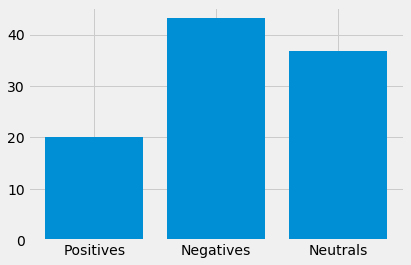

In [38]:
plt.bar(x, percentages)
plt.xticks(x, ['Positives', 'Negatives', 'Neutrals'])

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import math

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stop_words = set(stopwords.words('english'))
stop_words.add('u') # Reddit users seem to use this a lot
tokenizer = RegexpTokenizer(r'\w+')

def categorize_words(lines):
    word_list = []
    
    for line in lines:
        words = tokenizer.tokenize(line)
        for word in words:
            w = word.lower()
            if w not in stop_words:
                word_list.append(w)
    
    return word_list

positive_words = categorize_words(positives)
negative_words = categorize_words(negatives)

In [42]:
positive_words_freq = nltk.FreqDist(positive_words)
negative_words_freq = nltk.FreqDist(negative_words)
print(positive_words_freq.most_common(8))
print(negative_words_freq.most_common(8))

[('trump', 10), ('mueller', 6), ('russia', 4), ('manafort', 4), ('florida', 3), ('loans', 3), ('survivor', 3), ('finds', 3)]
[('gun', 12), ('trump', 11), ('florida', 9), ('students', 8), ('shooting', 7), ('parkland', 6), ('mass', 5), ('father', 5)]


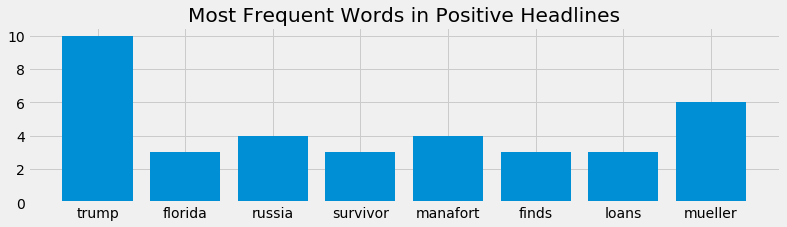

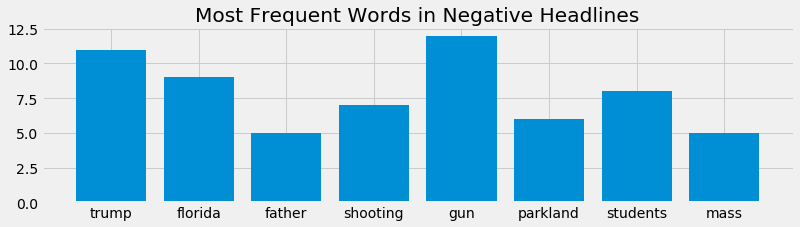

In [43]:
def plot_word_frequencies(words, category):
    freq = nltk.FreqDist(words)
    most_common = dict(freq.most_common(8))
    x = range(len(most_common))
    plt.figure(figsize=(12,3))
    plt.title("Most Frequent Words in {} Headlines".format(category))
    plt.bar(x, most_common.values(), align='center')
    plt.xticks(x, most_common.keys())
    
plot_word_frequencies(positive_words, "Positive")
plot_word_frequencies(negative_words, "Negative")